In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download(tickers='BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
...,...,...,...,...,...,...
2021-12-22,48937.097656,49544.796875,48450.941406,48628.511719,48628.511719,24447979559
2021-12-23,48626.343750,51332.339844,48065.835938,50784.539062,50784.539062,28223878108
2021-12-24,50806.050781,51814.027344,50514.496094,50822.195312,50822.195312,24367912228


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


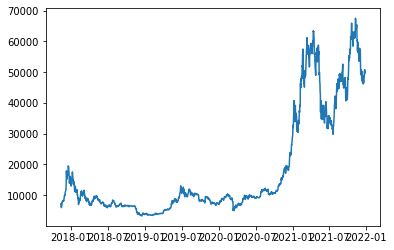

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# Train test split

to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

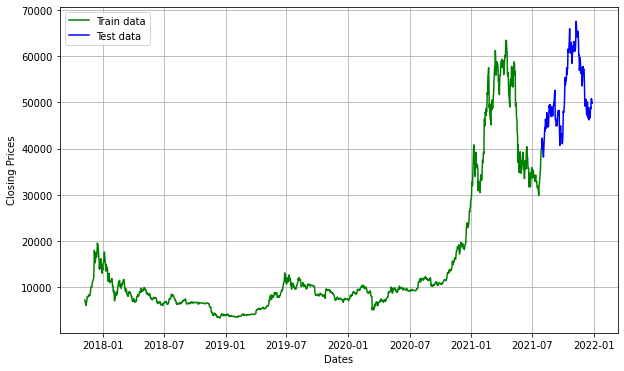

In [ ]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1508
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12558.696
Method:                       css-mle   S.D. of innovations           1001.350
Date:                Sun, 26 Dec 2021   AIC                          25129.392
Time:                        12:19:21   BIC                          25161.303
Sample:                             1   HQIC                         25141.277
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7044     26.392      1.088      0.277     -23.024      80.432
ar.L1.D.y     -0.0365      0.026     -1.418      0.156      -0.087       0.014
ar.L2.D.y      0.0008      0.026      0.029      0.9

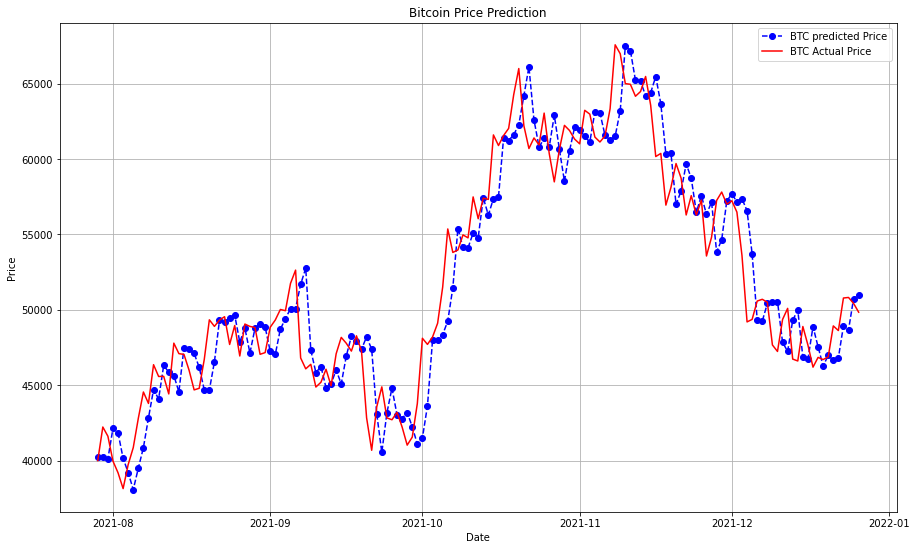

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:-1], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions[:-1]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) # Mean Absolute Percentage Error

# Around 3.8% MAPE(Mean Absolute Percentage Error) implies the model is about 96.2% accurate in predicting the test set observations.

MAPE: 0.0385525111351121
